In [1]:
import os
os.chdir('..')
import matplotlib.backends.backend_pdf as pdfSaver
import sys
from importlib import reload
from matplotlib import pyplot as plt
from tqdm import tqdm
import networkx as nx
import numpy as np
import ep_finder, lep_finder, graphs

In [89]:
reload(graphs)

<module 'graphs' from 'C:\\Users\\josep\\OneDrive\\Documents\\Para la Escuela\\Research\\Network Theory\\EquitablePartitions\\graphs.py'>

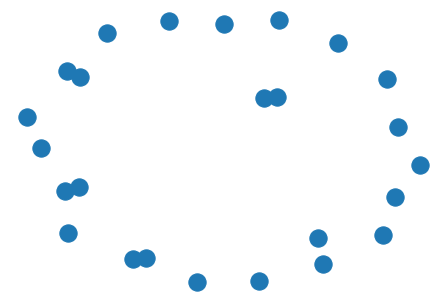

In [57]:
nx.draw(graph)

In [53]:
print(nontrivEp_dict)
print(nontrivLep_list)

{3: [57, 66, 67, 81, 97], 9: [2, 20]}
[{3}, {9}]


Nontrivial nodes progress:18/19
Total percentage on nontrivial nodes: 0.53
Total pairs in partition elements: 12
Percentage of nontrivial nodes in pairs: 0.4528301886792453


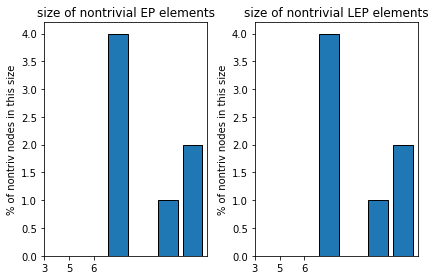

In [2]:
graph = nx.random_geometric_graph(100,.1)
relabeledGraph = graphs.relabel(graph)
ep_dict, lep_dict, coasestAndLocal = lep_finder.getEquitablePartitions(relabeledGraph,progress_bars=False)
nontrivEp_dict, nontrivLep_list,hist_list,perc = graphs.NontrivialityData(graph,ep_dict,lep_dict,return_vals=True)

probabilities tried: 100%|██████████| 20/20 [00:05<00:00,  3.40it/s]
<ipython-input-27-d7ca75c45c20>:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
probabilities tried: 100%|██████████| 20/20 [15:37<00:00, 46.86s/it]


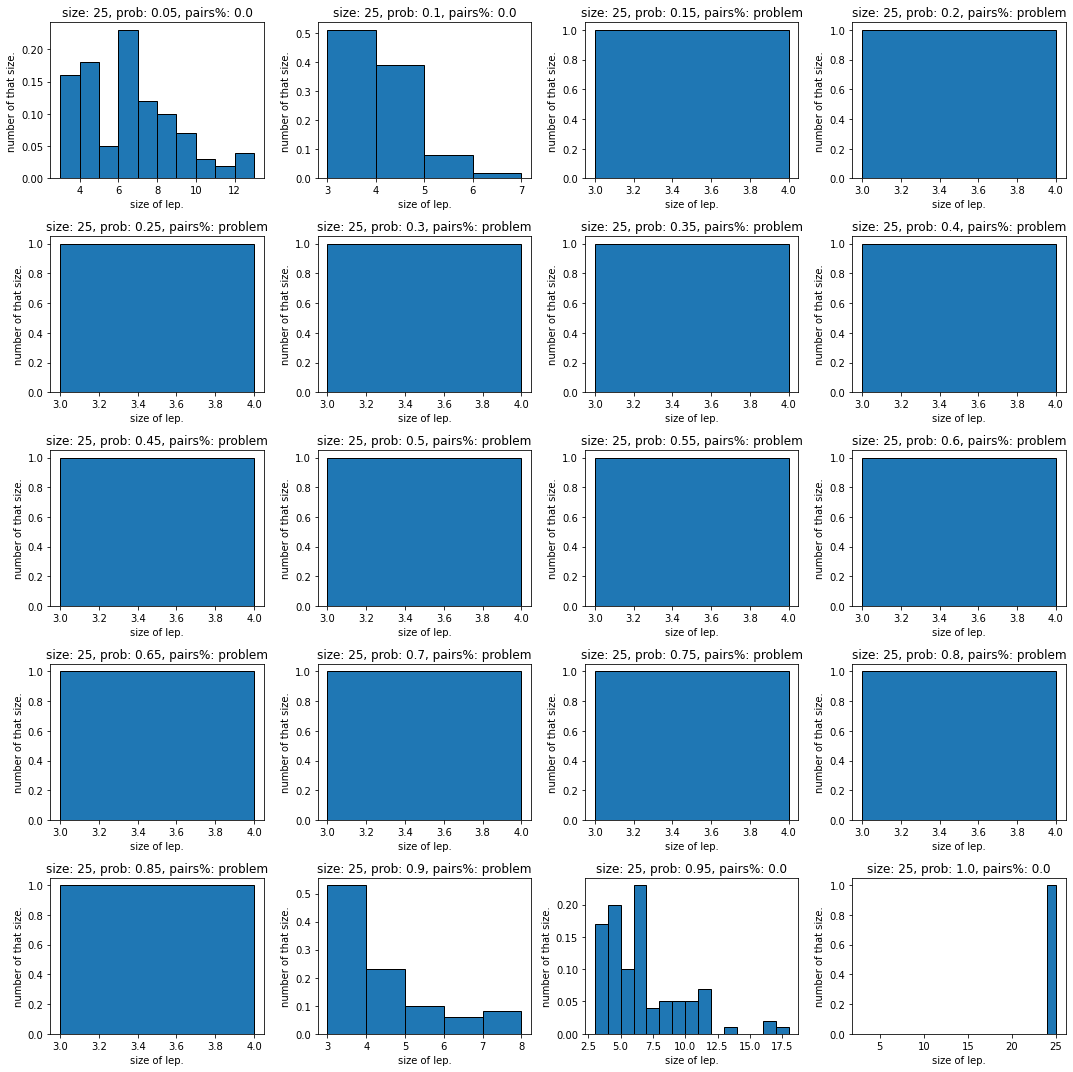

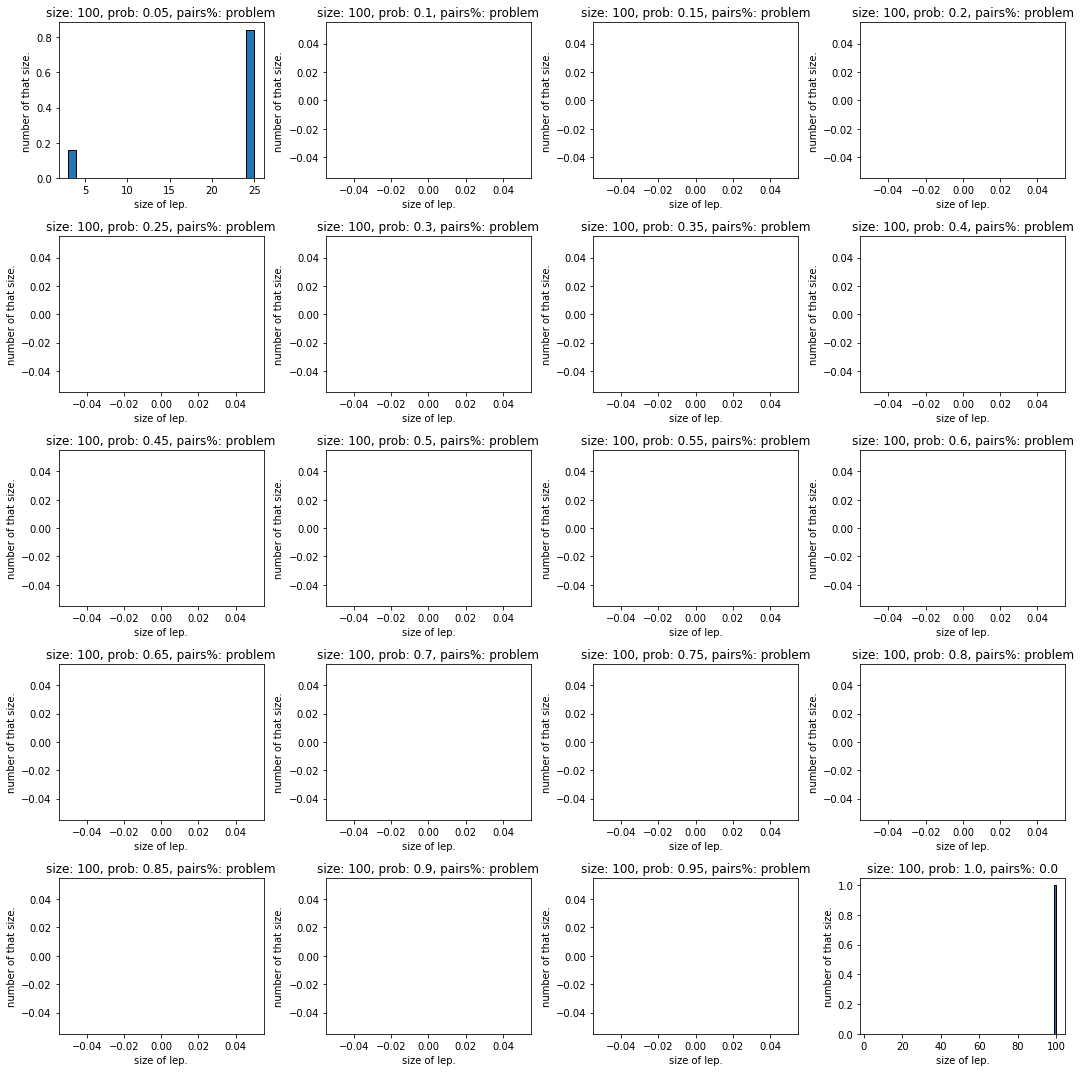

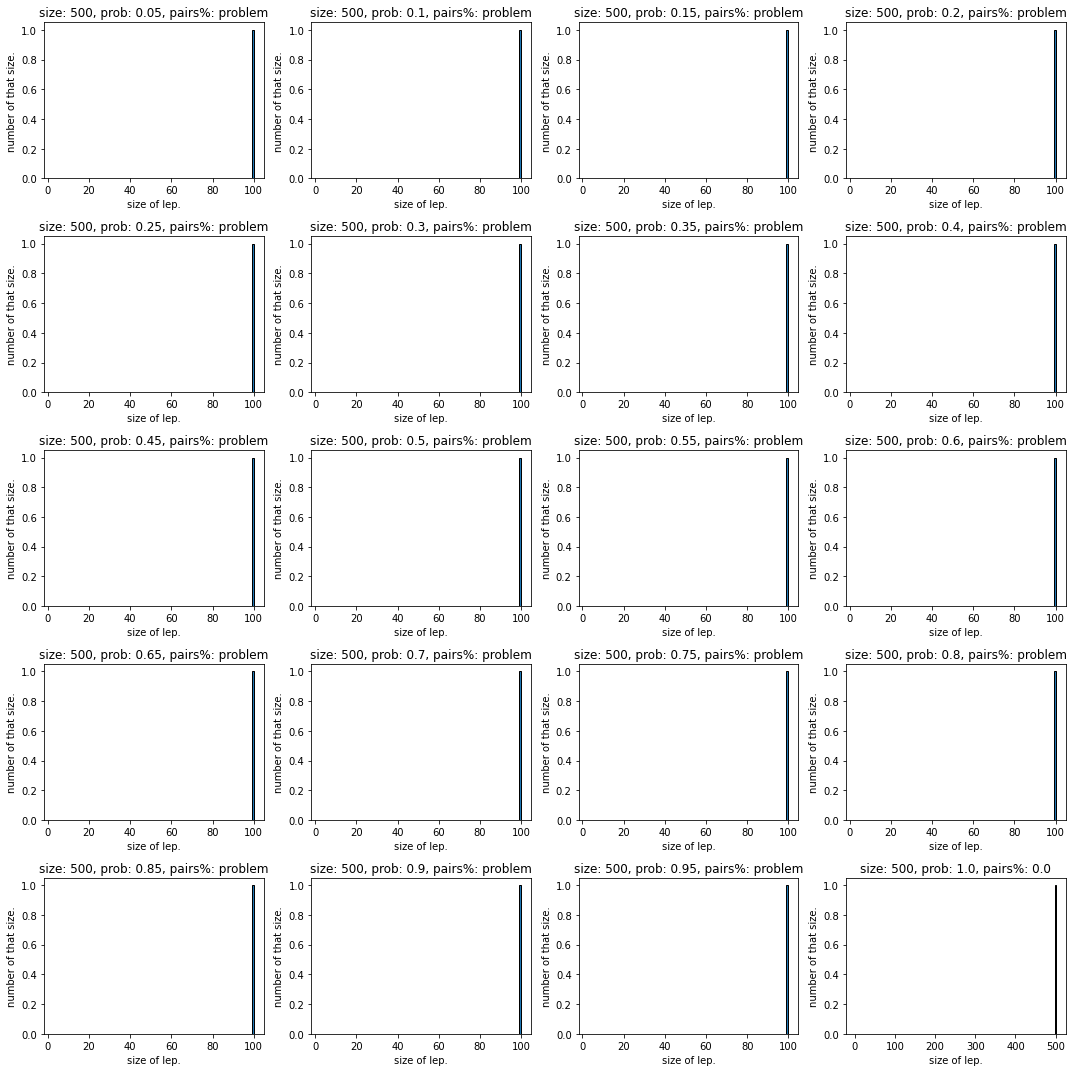

In [27]:
#pdf = pdfSaver.PdfPages("ErdosReyni_leps.pdf")
conn_prob = [i/100 for i in range(5,101,5)]
iterations = 100
nNodes_list = [25,100,500]
for nNodes in nNodes_list:
    row=-1
    lepSizes = []
    pdf_row_size=5
    pdf_col_size=4
    fig,ax = plt.subplots(pdf_row_size,pdf_col_size,figsize=(15,15))

    for index,prob in enumerate(tqdm(conn_prob,desc="probabilities tried")):
        lepSizes=[]
        ep_presence={}
        for i in range(iterations):
            graph=nx.erdos_renyi_graph(nNodes,prob)
            relabeledGraph = graphs.relabel(graph)
            ep_dict, lep_dict, coasestAndLocal = lep_finder.getEquitablePartitions(relabeledGraph,progress_bars=False)
            nontrivEp_dict, nontrivLep_list,hist_list,perc = graphs.NontrivialityData(graph,ep_dict,lep_dict,return_vals=True,plot=False,show_progress=False)
            ep_elements=list(set(hist_list))
            for size in ep_elements:
                ep_presence.[size](hist_list.count(size))
            print(ep_presence)
            """
            for lep in nontrivLep_list:
                lep_size = 0
                total_leps+=1
                for lep_el in list(lep):
                    lep_size+=len(ep_dict[lep_el])
            if lep_size==2:
                pairs+=1
            else:
                lepSizes.append(lep_size)"""
        """
        col = index%pdf_col_size
        if col==0:
            row+=1
        else:
            pairs_perc=pairs/total_leps
        ax[row][col].bar(ep_elements,ep_presence,edgecolor='black')
        ax[row][col].set_xticks(np.arange(len(ep_elements)),ep_elements)
        ax[row][col].set_xlabel("size of lep.")
        ax[row][col].set_ylabel("number of that size.")
        ax[row][col].set_title(f"size: {nNodes}, prob: {prob}, pairs%: {pairs_perc}")
        fig.tight_layout()
    pdf.savefig(fig)"""
    
    #fig.suptitle(f"Graphs of size: {nNodes}",fontsize=24)
 #   fig.show()
#pdf.close()